In [2]:
import tensorflow as tf
print(tf.__version__)

2.7.0


##Load Data

In [3]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
import numpy as np
import matplotlib.pyplot as plt

##Display one example

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

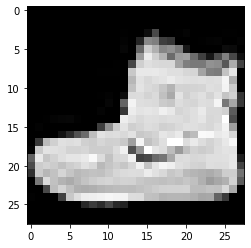

In [5]:
index = 0

np.set_printoptions(linewidth = 320)
print(x_train[index])
plt.imshow(x_train[index], cmap = "gray")
print("\nLABEL : ", y_train[index])

##Normilize pixels

In [6]:
x_train = x_train /255.0
x_test = x_test /255.0

##Build Model

In [7]:
from tensorflow.python.ops.gen_nn_ops import Conv2D
model = tf.keras.Sequential([

  #USING CONVOLUTIONS
  tf.keras.layers.Conv2D(filters = 64, kernel_size= (3,3), activation = tf.nn.relu, input_shape = (28,28,1)),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

  tf.keras.layers.Conv2D(filters = 64, kernel_size= (3,3), activation = tf.nn.relu, input_shape = (28,28,1)),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(512, activation = tf.nn.relu),
  tf.keras.layers.Dense(128, activation = tf.nn.relu),
  tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

##Create callback

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch, logs = {}):
    
    if(logs.get("loss")) < 0.20 :
      print("\nLoss < 0.4 sto stop training!")
      self.model.stop_training = True

callback = myCallback() 

##Train the model

In [9]:
from gc import callbacks
model.compile(optimizer = tf.optimizers.Adam(), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(x_train,y_train, batch_size = 32, shuffle= True, epochs = 5, callbacks = [callback])

Epoch 1/5
1875/1875 [==============================] - 20s 3ms/step - loss: 0.4387 - accuracy: 0.8383
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2824 - accuracy: 0.8953
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2359 - accuracy: 0.9113
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2004 - accuracy: 0.9250
Epoch 5/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.1713 - accuracy: 0.9354
Loss < 0.4 sto stop training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1712 - accuracy: 0.9355


##Evaluation on Test Set

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2499 - accuracy: 0.9138


[0.24992702901363373, 0.9138000011444092]

##Get the predictions

In [11]:
preds = model.predict(x_test)
preds

array([[2.98321650e-14, 2.10161706e-12, 3.06506945e-16, ..., 3.88337149e-08, 8.25827633e-13, 9.99999285e-01],
       [8.99351846e-07, 1.10690417e-12, 9.99877214e-01, ..., 1.04729246e-12, 2.29086139e-10, 1.85375735e-13],
       [5.22078179e-11, 1.00000000e+00, 6.61709945e-13, ..., 9.36190537e-22, 1.52971711e-12, 6.97761228e-23],
       ...,
       [4.77578209e-13, 6.30499943e-15, 2.75313338e-14, ..., 3.02963119e-14, 1.00000000e+00, 1.58307358e-14],
       [2.10444842e-10, 9.99999881e-01, 9.98687175e-11, ..., 2.34411736e-16, 5.89101656e-10, 2.65538079e-17],
       [2.76396304e-06, 9.62922755e-08, 1.00894285e-05, ..., 9.74518829e-04, 3.30974418e-03, 1.23395934e-04]], dtype=float32)

In [12]:
output = np.array([np.argmax(prediction) for prediction in preds])
output

array([9, 2, 1, ..., 8, 1, 5])

##Visualize Convolutions and Pooling

In [15]:
print(y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


You can see that the ones at index 0, index 23 and index 28 are all the same value (i.e. 9). They're all shoes.

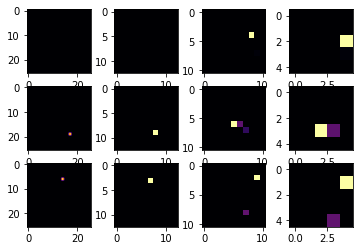

In [21]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)